# Activity 2 Part 2

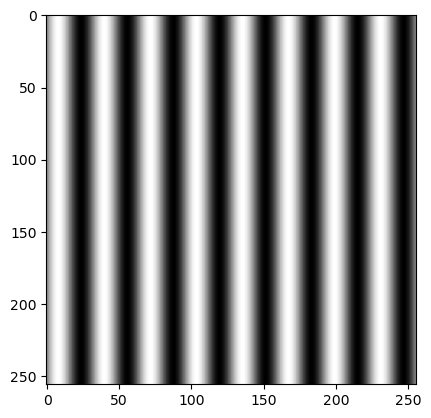

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import sin, cos, pi

def sinusoid(N, f, theta=0):  # generate sinusoid, N - no. of pixels, f - frequency, theta - angle of rotation
    x = np.linspace(-1,1,N)
    y = np.linspace(-1,1,N)                # sin(2f*pi x) f determines frequency per unit
    X,Y = np.meshgrid(x,y)
    sinusoid = sin(2*pi*f*(Y*sin(theta) + X*cos(theta)))
    return sinusoid

N = 256
f=4

z = sinusoid(N,f)

plt.imshow(z, cmap='gray')

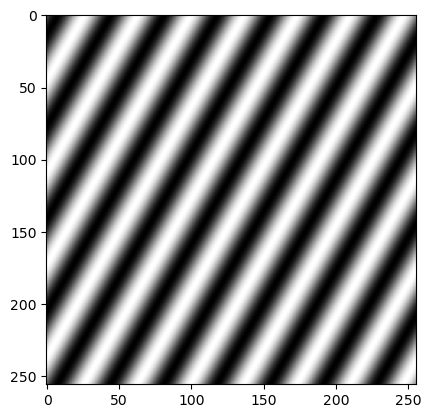

In [120]:
z_rot = sinusoid(N, f, pi/6)

plt.imshow(z_rot, cmap='gray')

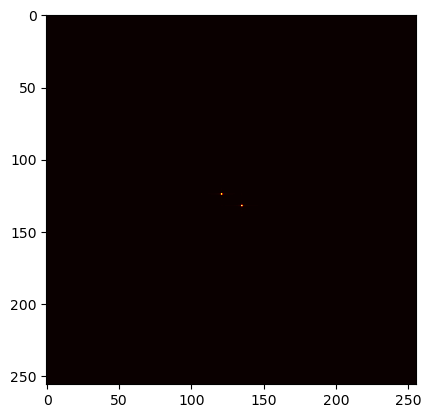

In [115]:

from numpy.fft import fft2, ifft2, fftshift

z_rot_fft = fftshift(fft2(z_rot))

plt.imshow(abs(z_rot_fft), cmap='hot')

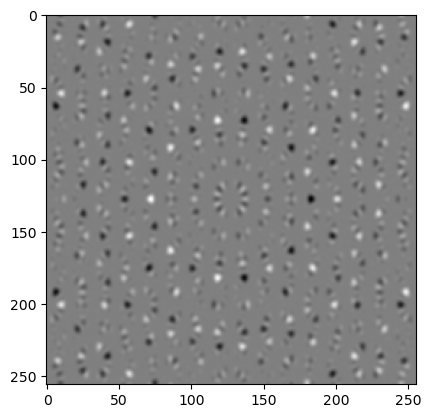

In [167]:
thetas = linspace(0,2*pi, 10)

z = sinusoid(N,f)
for t in thetas:
    z *= sinusoid(N,f,theta=t)

# z = sinusoid(N, f, theta=0)*sinusoid(N,f,theta=pi)*sinusoid(N,f,theta=2*pi)

plt.imshow(z, cmap='gray')

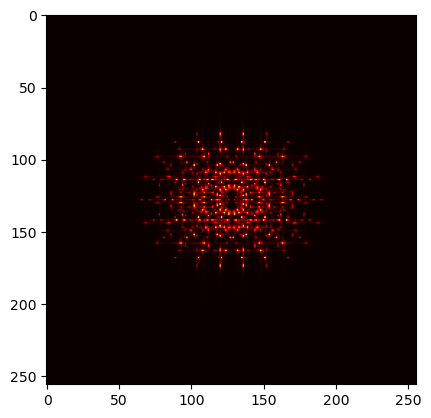

In [169]:
z_rot_fft = fftshift(fft2(z))

plt.imshow(abs(z_rot_fft), cmap='hot')

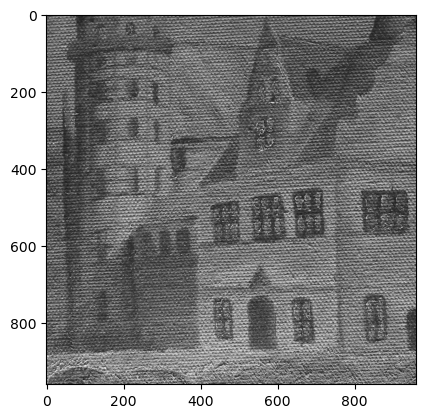

In [211]:
daria = plt.imread('painting.JPG')

plt.imshow(daria)

def mean_gray(img):
    grayscale = np.dot(img[...,:3],[0.2989, 0.5870, 0.1140])
    return grayscale

daria_gray = mean_gray(daria)

daria_gray = daria_gray[:960,:960]

plt.imshow(daria_gray, cmap='gray')

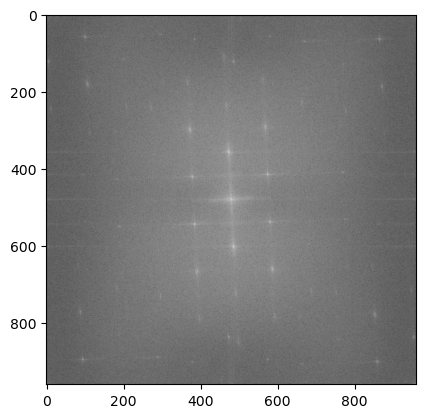

In [281]:
daria_ft = fftshift(fft2(daria_gray))

# plt.axvline(x= 130)
# plt.axhline(y = 65)


plt.imshow(np.log(abs(daria_ft)), cmap='gray')

(array([80]), array([80]))

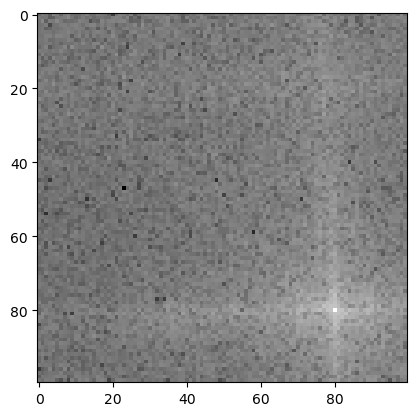

In [273]:
def crop(img, x_start, x_stop, y_start, y_stop):
    img = img[y_start:y_stop, x_start:x_stop]
    return img

def maxAtCrop(img):
    max_local = abs(img).max()
    x,y = np.where(abs(img) == max_local)
    return x,y

daria_crop = crop(daria_ft,400,500,400,500)

plt.imshow(np.log(abs(daria_crop)), cmap='gray')
maxAtCrop(daria_crop)

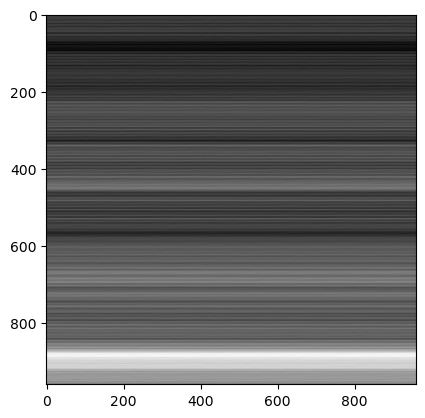

In [283]:
mask = plt.imread('mask.jpg')

mask_ft = fftshift(fft2(mask))

convolv = daria_ft*mask_ft[:,:,1]

plt.imshow(abs(convolv), cmap='gray')

magandang_painting = ifft2(convolv)

plt.imshow(abs(magandang_painting), cmap='gray')